## Portfólios Hierárquicos

<h5>Ainda não desenvolvi meu código próprio para esses portfólios, apenas para desmonstração como o HRP aloca os pesos

### Portfólio de Paridade de Risco Hierárquico (HRP)

https://deliverypdf.ssrn.com/delivery.php?ID=484029088111000006078110091003117072016089038039060053007118000027101105086071094109010114056102019017037123126025070095007123048032033082076097115109125093116068038017009092066120087080119116077081119006082127097091096021004080012086005066078070&EXT=pdf&INDEX=TRUE


Em 2015, o professor Marcos López de Prado publicou o artigo BUILDING DIVERSIFIED PORTFOLIOS THAT OUTPERFORM OUT-OF-SAMPLE, onde expõe a idéia de um portfólio de Paridade de Risco utilizando agrupamento hierarquicos para definir a alocação de ativos. 

O método HRP pode ser dividido em três etapas:
- Agrupamento Hierárquico
- Organização de Matriz
- Bisseção Recursiva

**Agrupamento Hierárquico**  
Essa etapa divide o os ativos do portfólio em diferentes agrupamentos hierárquicos usando o algoritmo de Agrupamento de Árvore Hierárquica.  
Esse agrupamento é realizado de forma aglomerativa, ou seja do menor grupo até um grupo que abrange toda a carteira.  
<img src="https://quantdare.com/wp-content/uploads/2016/06/AggloDivHierarClustering-800x389.png" alt="drawing" width="600"/>

**Organização de Matriz**  
A matriz de covariancia é organizaada usando a ordem dos agrupamentos criados na etapa anterior, mostrando as colunas e linhas da matrix de covariancia de forma que as maiores covariancias são colocadas diagonalmente e os  elementos menores ao redor dessa diagonal e, uma vez que os elementos fora da diagonal não são completamente zero, isso é chamado de *matriz de covariância pseudo-diagonal*."  
<img src="https://hudsonthames.org/wp-content/uploads/2020/01/Screen-Shot-2020-01-05-at-9.20.16-PM-1.png" alt="drawing" width="300"/>

**Bisseção Recursiva**  
Nessa etapa, os pesos são definidos para os ativos, através da inversão da volatilidade, semelhante ao portfólio ERC mas o risco devido aquele agrupamento é alocado nos ativos.  
A operação então desse um nível na árvore com o percentual do risco restante, até que todos os pesos sejam atribuídos aos ativos do portfólio.  
Os pesos são atribuídos de cima para baixo baseado na variancia do subagrupamento. a principal vantagem dessa forma é que somente os ativos do mesmo grupo competem pela alocação em vez de competir com todos os ativos do portfólio.


In [2]:
%load_ext autoreload
%autoreload 2  

import numpy as np
import pandas as pd
import yfinance as yf
import functions as f
import matplotlib.pyplot as plt
import datetime as dt
import funcoes as f
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)

In [120]:
stock_prices = pd.read_csv('precos.csv', sep=';', index_col='Date')['2020':'2022']
benchmark = stock_prices['BOVA11.SA']
stocks = [
    'ABEV3.SA', 'PETR4.SA', 'AMER3.SA', 'B3SA3.SA', 'BBAS3.SA', 'BBDC4.SA', 
    'BRKM5.SA', 'CIEL3.SA', 'CMIG4.SA', 'CPLE6.SA', 'ELET3.SA', 'EMBR3.SA',
    'GGBR4.SA', 'GOAU4.SA', 'GOLL4.SA', 'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA', 
    'LREN3.SA', 'SANB11.SA', 'SUZB3.SA', 'TAEE11.SA', 'TIMS3.SA', 'TRPL4.SA', 
    'USIM5.SA', 'VALE3.SA', 'VIIA3.SA', 'VIVT3.SA', 'WEGE3.SA',
    ]
stock_prices = stock_prices[stocks]
rets = f.returns(stock_prices.dropna(axis='columns'))

In [121]:
import riskfolio as rp

In [144]:
port = rp.HCPortfolio(returns=rets)

# Estimando portfólio ótimo:
linkage = 'ward' # Método de linkagem usada para construir os agrupamento
codependence = 'distance' # Métrica construir a Matrix dentro do agrupamento
leaf_order = False # Consider optimal order of leafs in dendrogram
model='HRP' # modelo
rm = 'MV' # Métrica de risco, Média Variancia
rf = 0 # Risk free rate

w_HRP = port.optimization(model=model,
                      codependence=codependence,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      k=10,
                      leaf_order=leaf_order)

display(w_HRP.T)

,ABEV3.SA,PETR4.SA,AMER3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BRKM5.SA,CIEL3.SA,CMIG4.SA,CPLE6.SA,...,SANB11.SA,SUZB3.SA,TAEE11.SA,TIMS3.SA,TRPL4.SA,USIM5.SA,VALE3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA
weights,0.054263,0.009507,0.016867,0.025752,0.016214,0.0231,0.012482,0.015055,0.034427,0.021996,...,0.038485,0.072076,0.058456,0.030788,0.107651,0.012182,0.046366,0.010716,0.130984,0.042016


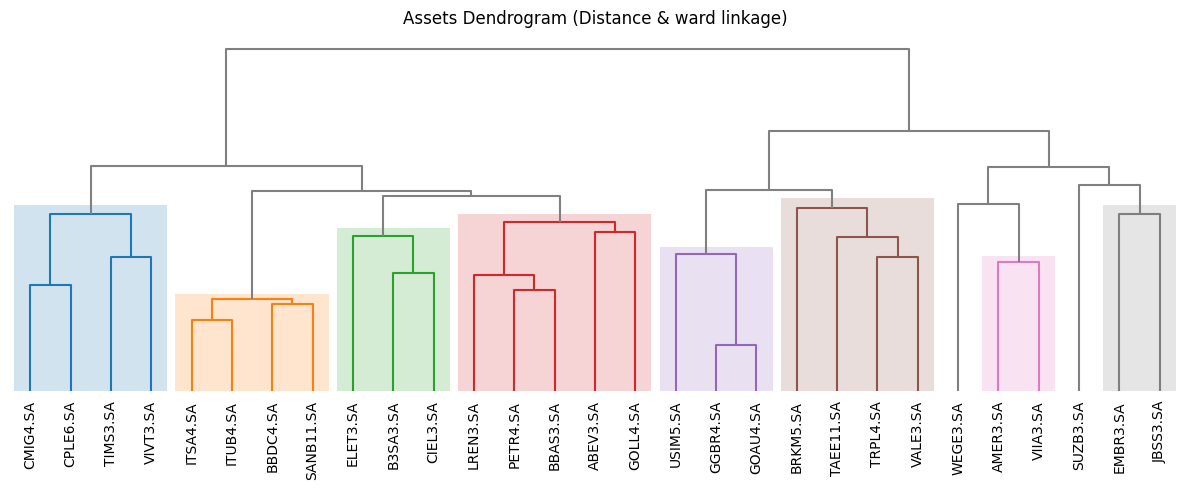

In [145]:
ax = rp.plot_dendrogram(returns=rets,
                        codependence=codependence,
                        linkage=linkage,
                        k=10,
                        leaf_order=leaf_order,
                        ax=None)

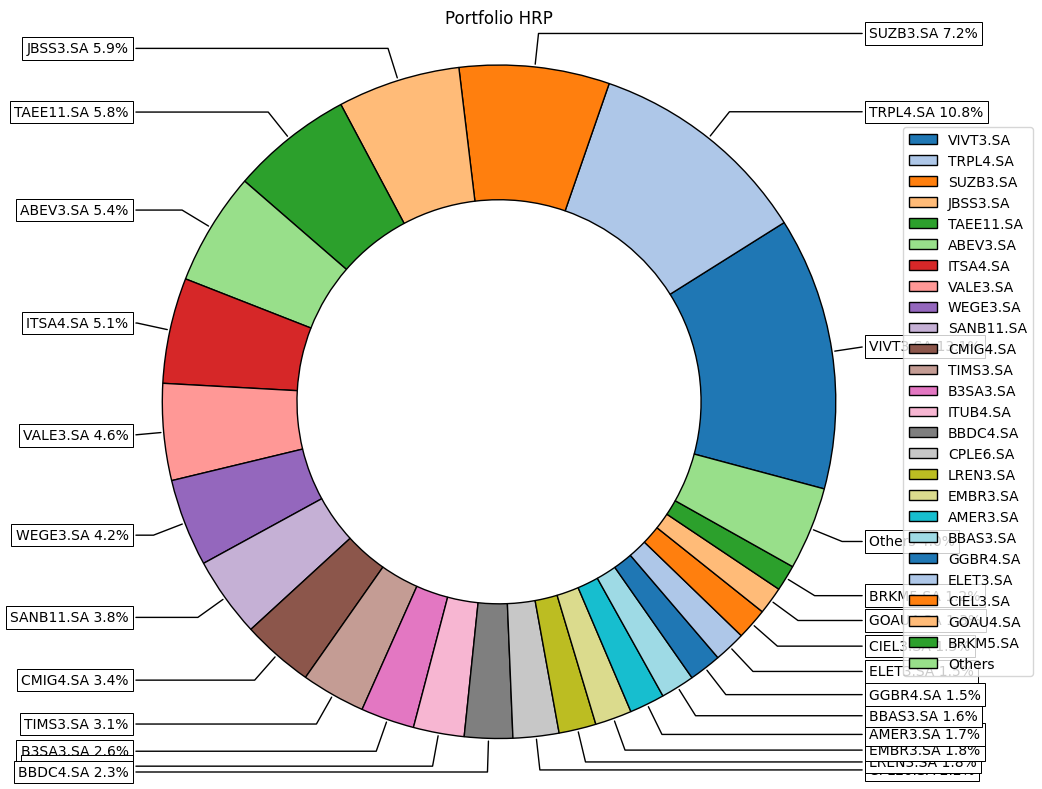

In [146]:
ax = rp.plot_pie(w=w_HRP,
                 title='Portfolio HRP',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=8,
                 width=10,
                 ax=None)

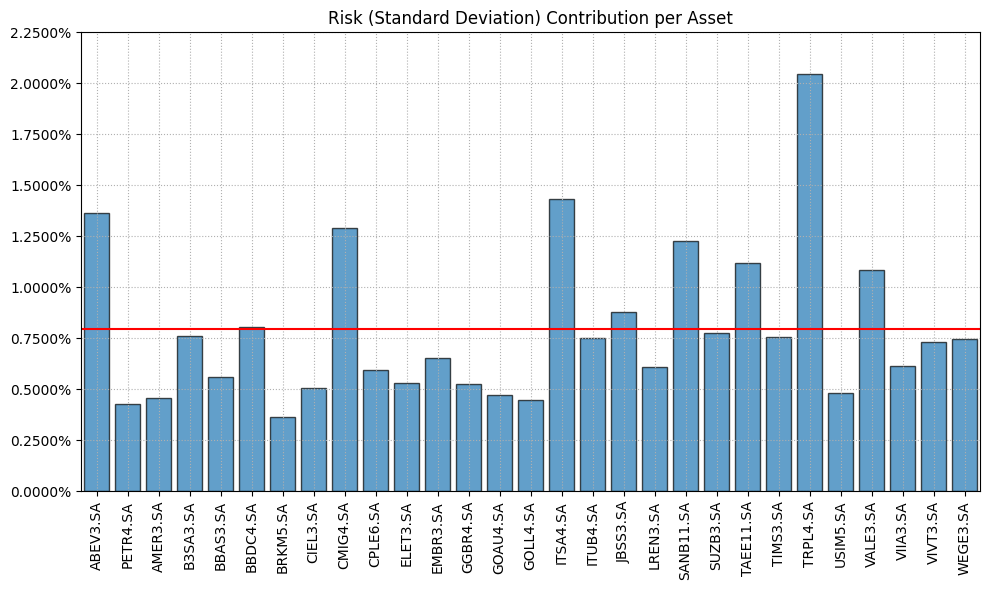

In [147]:
# Plotting the risk contribution per asset
mu = rets.mean() # média do Retorno
cov = rets.cov() # Matriz de Covaraincia
returns = rets

ax = rp.plot_risk_con(w=w_HRP,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=12,
                      ax=None)

## Portfólio de Contribuição de Risco Igual Hierárquico (HERC)